## Classification and Regression Tree(CART)

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [76]:
from warnings import filterwarnings
filterwarnings('ignore')

In [77]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

In [78]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## Model & Tahmin

In [79]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [80]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

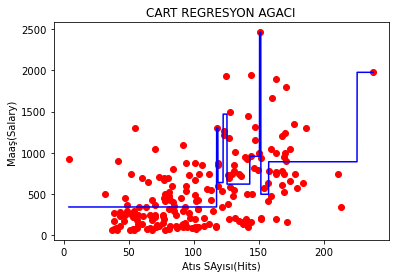

In [81]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X_train, y_train, color='red')

plt.plot(X_grid, cart_model.predict(X_grid),color ='blue')

plt.title('CART REGRESYON AGACI')
plt.xlabel('Atıs SAyısı(Hits)')
plt.ylabel('Maaş(Salary)');

### tek degişken tahmin

In [82]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [83]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

### tüm değişkenler

In [84]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

In [85]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [86]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

520.9411645586547

### Model Tuning

In [87]:
cart_model = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

391.5530522634767

In [88]:
cart_params = {"max_depth":[2,3,4,5,10,20],
              "min_samples_split":[2,10,5,30,50,10]}

In [89]:
cart_model=DecisionTreeRegressor()

In [90]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [91]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [92]:
#final model

In [93]:
cart_tuned=DecisionTreeRegressor(max_depth = 4, min_samples_split=50).fit(X_train,y_train)

In [74]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434